#  Flats Price Analysis in Bangalore

## problem statement
- Analysing flats availability and budget.
  - Based on BHK, Area_sqft,Price_Per_sqft,Total_Price,Location and Construction_Status


## Importing required packages


In [1]:
import pandas as pd                 # For reading a dataframe and used to parform row and column operations
import numpy as np                  # Used for arthematic operations on dataframe
import matplotlib.pyplot as plt     # It is useful for graphs and plots
import seaborn as sb                # Used for Visualization

# Data Cleaning

In [2]:
# Reading/loading the dataset
bangalore_flats=pd.read_csv("C:/Users/vijay/Downloads/bangalore_properties.csv")

In [3]:
bangalore_flats

,Unnamed: 0,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price,Unit,Location,Construction_Status
0,0,Trishul Builders And Promoters,2.0,1210,"3,376 / sq ft",40.84,L,Sompura,Under Construction
1,1,Anuraag Constructions,3.0,1520,"5,120 / sq ft",77.83,L,Varthur,Under Construction
2,2,SNN Estates,4.0,2275,"6,731 / sq ft",1.53,Cr,Bettadasanapura,Under Construction
3,3,Vara Constructions,3.0,1845,"5,435 / sq ft",1.00,Cr,Uttarahalli,Ready to move
4,4,S B Urbanscapes,3.0,1770,"7,459 / sq ft",1.32,Cr,Uttarahalli,Under Construction
...,...,...,...,...,...,...,...,...,...
2355,2355,Elite Lifespaces,3.0,2000,"9,750 / sq ft",1.95,Cr,Chamrajpet,Ready to move
2356,2356,Elite Lifespaces,1.0,660,"10,303 / sq ft",68.00,L,Chamrajpet,Ready to move
2357,2357,Elite Lifespaces,2.0,1350,"8,518 / sq ft",1.15,Cr,Chamrajpet,Ready to move
2358,2358,Elite Lifespaces,2.0,1455,"9,278 / sq ft",1.35,Cr,Chamrajpet,Ready to move


In [4]:
# As we can see the unnamed column and index are same os we drop the unnamed column
bangalore_flats.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
# getting only the price in price_per_sqft
g=[]    
for i in range(len(bangalore_flats)):
    g.append(bangalore_flats['Price_Per_sqft'][i][:-8])
bangalore_flats['Price_Per_sqft']=g

In [6]:
# Removing the , from the price_per_sqft column
q=[]
for i in range(len(bangalore_flats)):    
    n=bangalore_flats['Price_Per_sqft'][i].split(',')
    q.append("".join(n))
bangalore_flats['Price_Per_sqft']=q

In [7]:
bangalore_flats.head()

,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price,Unit,Location,Construction_Status
0,Trishul Builders And Promoters,2.0,1210,3376,40.84,L,Sompura,Under Construction
1,Anuraag Constructions,3.0,1520,5120,77.83,L,Varthur,Under Construction
2,SNN Estates,4.0,2275,6731,1.53,Cr,Bettadasanapura,Under Construction
3,Vara Constructions,3.0,1845,5435,1.00,Cr,Uttarahalli,Ready to move
4,S B Urbanscapes,3.0,1770,7459,1.32,Cr,Uttarahalli,Under Construction


In [8]:
u=[]
for i in range(len(bangalore_flats)):    
   u.append( bangalore_flats['Unit'][i].strip())
bangalore_flats['Unit']=u

In [9]:
#In the dataframe the price column is the total price of the property with the corresponding to the unit column where L = Lakhs and Cr = Croreprice is in rupees
bangalore_flats['Unit'].replace('Cr',100,inplace=True)
bangalore_flats['Unit'].replace('L',1,inplace=True)


In [10]:
# Here we are converting the price of the properties into lakhs 
bangalore_flats['Total_Price']=bangalore_flats['Total_Price']*bangalore_flats['Unit']

In [11]:
bangalore_flats.drop('Unit',inplace=True,axis=1)

In [12]:
bangalore_flats.head()

,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price,Location,Construction_Status
0,Trishul Builders And Promoters,2.0,1210,3376,40.84,Sompura,Under Construction
1,Anuraag Constructions,3.0,1520,5120,77.83,Varthur,Under Construction
2,SNN Estates,4.0,2275,6731,153.00,Bettadasanapura,Under Construction
3,Vara Constructions,3.0,1845,5435,100.00,Uttarahalli,Ready to move
4,S B Urbanscapes,3.0,1770,7459,132.00,Uttarahalli,Under Construction


In [13]:
#we change the Total_Price as Total_Price(in_lakhs)
bangalore_flats.rename(columns={'Total_Price':'Total_Price(in_lakhs)'},inplace=True)


In [14]:
bangalore_flats.head(3)

,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price(in_lakhs),Location,Construction_Status
0,Trishul Builders And Promoters,2.0,1210,3376,40.84,Sompura,Under Construction
1,Anuraag Constructions,3.0,1520,5120,77.83,Varthur,Under Construction
2,SNN Estates,4.0,2275,6731,153.00,Bettadasanapura,Under Construction


In [15]:
bangalore_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Builder                2360 non-null   object 
 1   BHK                    2078 non-null   float64
 2   Area_sqft              2360 non-null   int64  
 3   Price_Per_sqft         2360 non-null   object 
 4   Total_Price(in_lakhs)  2360 non-null   float64
 5   Location               2360 non-null   object 
 6   Construction_Status    2360 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 129.2+ KB


## Observation:
- We have null values in bhk column
- We have two float data type columns
- We have two int data type columns
- We have four object data type columns
- Bhk column is in float we want it to be in integer
- Price per sqrt is also in object we want it to be in float

In [16]:
# bhk column is a categorical column so we replace the missing value with the mode of the BHK column
bangalore_flats['BHK']=bangalore_flats['BHK'].fillna(3)

In [17]:
bangalore_flats['BHK']=bangalore_flats['BHK'].astype(int)

In [18]:
# bhk column is a categorical column so we convert the categorial into numarical column
bangalore_flats['Price_Per_sqft']=bangalore_flats['Price_Per_sqft'].astype(int)

In [19]:
bangalore_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Builder                2360 non-null   object 
 1   BHK                    2360 non-null   int32  
 2   Area_sqft              2360 non-null   int64  
 3   Price_Per_sqft         2360 non-null   int32  
 4   Total_Price(in_lakhs)  2360 non-null   float64
 5   Location               2360 non-null   object 
 6   Construction_Status    2360 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(3)
memory usage: 110.8+ KB


## Observation:
   - Here we have a dataframe with no null values
   - All the columns have in porper data type
   - We have one float data type columns
   - We have four int data type columns
   - We have three object data type columns

In [20]:
bangalore_flats.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,2360.0,2.908898,1.191216,1.0,2.000,3.0,3.00,11.0
Area_sqft,2360.0,1854.867373,1416.150429,333.0,1150.750,1377.5,1890.75,14000.0
Price_Per_sqft,2360.0,6405.071186,3117.882979,459.0,4631.250,5583.5,7335.75,33333.0
Total_Price(in_lakhs),2360.0,129.778025,162.915039,9.0,55.745,80.0,132.00,2000.0


Observations:
From the above table we can say
- BHK: median = 3, min = 1,max = 11,25% = 2,75% = 3
- Area_sqft:mean = 1854.867373, median = 1377.50000, std = 1416.150429,min = 333.00000,max = 14000.00000,25% = 1150.750000,75% = 1890.750000
-Price_Per_sqft:mean = 6405.071186, median = 5583.500000,std = 3117.882979,min = 459.000000,max = 33333.000000,25% = 4631.250000,75% = 7335.750000
-Total_Price(in_lakhs):,mean = 129.778025,median = 80.000000,std = 162.915039,min = 9.000000,max = 2000.000000, 25% = 55.745000,75% = 132.000000

In [21]:
bangalore_properties=bangalore_flats[(bangalore_flats['BHK']==2) | (bangalore_flats['BHK']==3) 
                                     | (bangalore_flats['BHK']==4) | (bangalore_flats['BHK']==5)]

In [22]:
bangalore_properties

,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price(in_lakhs),Location,Construction_Status
0,Trishul Builders And Promoters,2,1210,3376,40.84,Sompura,Under Construction
1,Anuraag Constructions,3,1520,5120,77.83,Varthur,Under Construction
2,SNN Estates,4,2275,6731,153.00,Bettadasanapura,Under Construction
3,Vara Constructions,3,1845,5435,100.00,Uttarahalli,Ready to move
4,S B Urbanscapes,3,1770,7459,132.00,Uttarahalli,Under Construction
...,...,...,...,...,...,...,...
2354,Elite Lifespaces,2,1365,9157,125.00,Chamrajpet,Ready to move
2355,Elite Lifespaces,3,2000,9750,195.00,Chamrajpet,Ready to move
2357,Elite Lifespaces,2,1350,8518,115.00,Chamrajpet,Ready to move
2358,Elite Lifespaces,2,1455,9278,135.00,Chamrajpet,Ready to move


# Data Visualization  &  Data Analysis 

## Uni - Variate

#### Single Cat

In [23]:
cat_col=bangalore_properties.select_dtypes(exclude='number').columns.tolist()
cat_col.append('BHK')

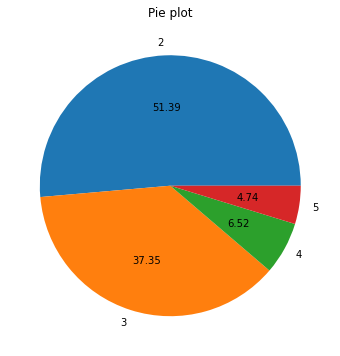

In [24]:
plt.figure(figsize=(6,6))
v=[2,3,4,5]
plt.pie(bangalore_properties['BHK'].value_counts(),autopct='%.2f',labels=v)
plt.title('Pie plot')
plt.show()

## Observation :
- 51.39%  of the properties are 2 bhk properties
- 37.35%  of the properties are 3 bhk properties
- 6.52%  of the properties are 4 bhk properties
- 4.74%  of the properties are 5 bhk properties


C:\Users\vijay\anaconda3\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


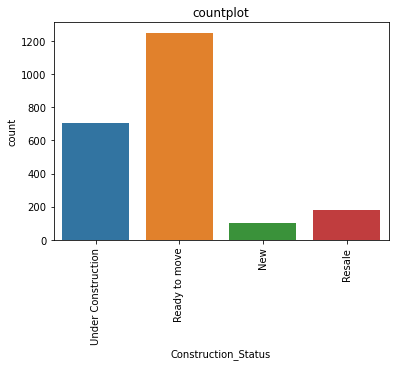

In [25]:
plt.xticks(rotation=90)
sb.countplot('Construction_Status',data=bangalore_properties)
plt.title('countplot')
plt.show()

## Observation :
- Maximaum number of flats are ready to move 
- New and resale properties are few

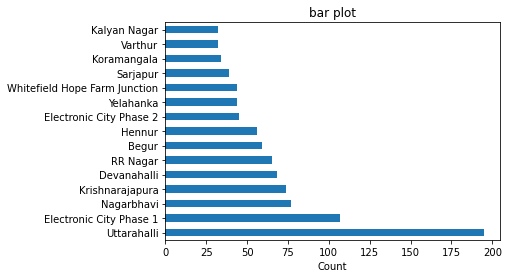

In [26]:
plt.xlabel('Count')
bangalore_properties['Location'].value_counts()[:15].plot(kind='barh')
plt.title('bar plot')

plt.show()

## Observation:
   - The top 15 locations in Bangalore where the maximum number of properties are  available to buy
   - Maximum number of flats in Uttarahalli , Bangalore .

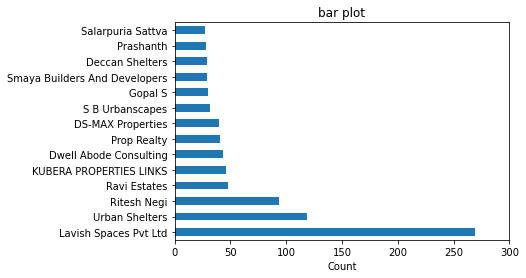

In [27]:
plt.xlabel('Count')
bangalore_properties['Builder'].value_counts()[1:15].plot(kind='barh')
plt.xlim([0,300])
plt.title('bar plot')
plt.show()

## Obsrevation :
   - The top 15 construction companies
   - The Lavish Spaces pvt Ltd is the construction company  who have maximum number of properties

In [28]:
z=bangalore_properties.select_dtypes(include='number').columns
z

Index(['BHK', 'Area_sqft', 'Price_Per_sqft', 'Total_Price(in_lakhs)'], dtype='object')

In [29]:
num_col=z.drop(['BHK']).tolist()
num_col

['Area_sqft', 'Price_Per_sqft', 'Total_Price(in_lakhs)']

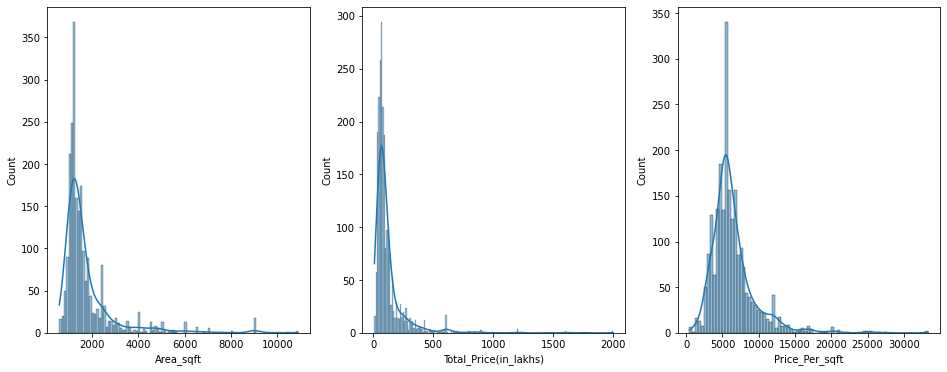

In [30]:
fig,axs=plt.subplots(figsize=(16,6),ncols=3)
sb.histplot(x='Area_sqft',data=bangalore_properties,kde=True,ax=axs[0])
sb.histplot(x='Total_Price(in_lakhs)',data=bangalore_properties,kde=True,ax=axs[1])
sb.histplot(x='Price_Per_sqft',data=bangalore_properties,kde=True,ax=axs[2])
plt.show()

## Observation :

   - Maximum number of properties have of area sqft within the range of 950 sqft to 1500 sqft

   - Maximum number of properties have of price per sqft within the range of price 4500 per sqft to price 7600 per sqft

   - Maximum number of properties have of price (in lakhs) within the range of price (in lakhs): 30 to price (in lakhs): 90
    

In [31]:
bangalore_properties.pivot_table(bangalore_properties,index=['BHK','Construction_Status'])

Area_sqft  Price_Per_sqft  Total_Price(in_lakhs)
BHK Construction_Status                                                    
2   Ready to move        1147.128049     5560.386179              64.426748
    Under Construction   1142.375000     5810.162791              66.455727
3   New                  1976.525253     4643.030303              84.648788
    Ready to move        1717.077899     6580.469203             119.070091
    Resale               1851.737705     6885.387978             141.555738
    Under Construction   1641.170886     6667.686709             113.379715
4   Ready to move        3120.355140     8306.869159             280.509159
    Under Construction   2753.205128     8405.794872             237.446923
5   Ready to move        5602.153061     8894.489796             505.673469
    Under Construction   3537.500000     6348.625000             301.875000

## Observation: 
   - The average area sqft ,average price per sqft and average total price for the desired  properties 

## Bi - Variate

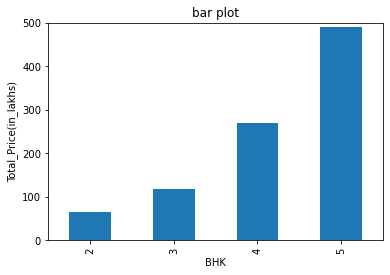

In [32]:
plt.ylabel('Total_Price(in_lakhs)')
bangalore_properties.groupby(by='BHK')['Total_Price(in_lakhs)'].mean().plot(kind='bar')
plt.ylim([0,500])
plt.title('bar plot')
plt.show()

## Observation :
- The average price for the number of bhk 
- As the number of BHK increases the average price also increases except in 5 BHK properties 

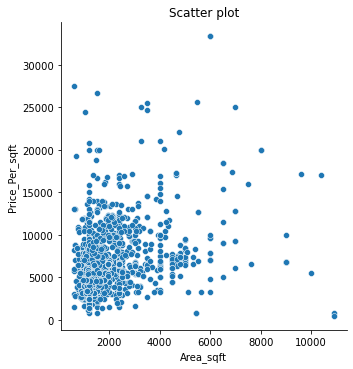

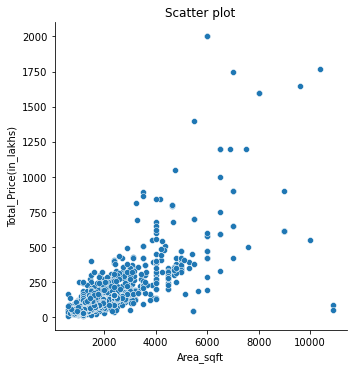

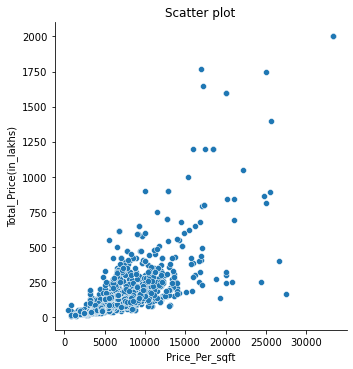

In [33]:
for col1 in range(len(num_col)):
    for col2 in range(col1+1,len(num_col)):
        sb.relplot(x=bangalore_properties[num_col[col1]],y=bangalore_properties[num_col[col2]],dashes=True)
        plt.title('Scatter plot')
        plt.show()

## Observation :
   - Area in sqft of 500 to 3500 have the price per sqft of 1000 to 15000
   - As the area in sqft increases the total price increases
   - As the price per sqft increases the total price increases

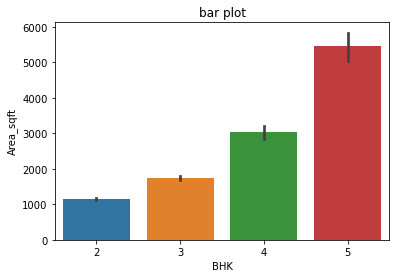

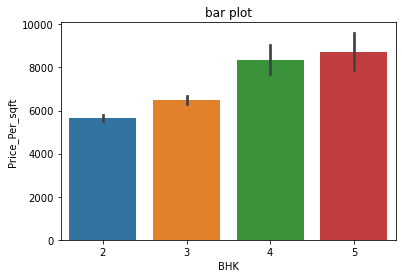

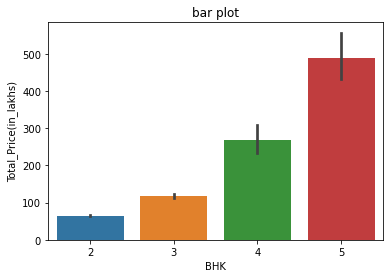

In [34]:
for j in range(len(num_col)):
    sb.barplot(x='BHK',y=bangalore_properties[num_col[j]],data=bangalore_properties)  
    plt.title('bar plot')
    plt.show()
    

## Observation :
   - As the number of BHK incerases the price per sqft  increases
        

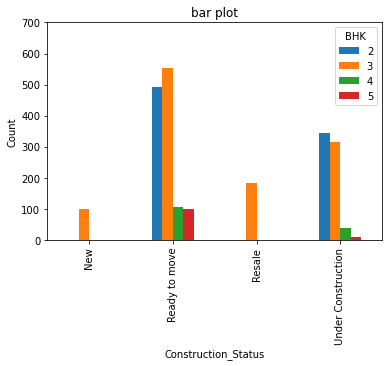

In [35]:
#  cat with bhk
pd.crosstab(bangalore_properties['Construction_Status'],bangalore_properties['BHK']).plot(kind='bar')
plt.title('bar plot')
plt.ylabel('Count')
plt.ylim([0,700])
plt.show()


## Observation:
   - new  and resale properties have only 3 BHK properties available 
   - In  ready to move properties 3 BHK properties are high and 5 BHK properties are low
   - In under construction properties 2 BHK properties are high and 5 BHK properties are low
   - 3 BHK property is available  in every condition

## Multi - Variate

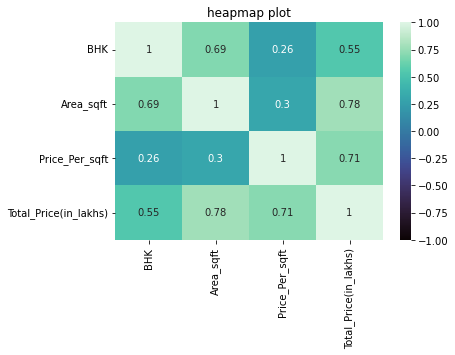

In [36]:
sb.heatmap(bangalore_properties.corr(),vmin=-1,vmax=1,annot=True,cmap='mako')
plt.title('heapmap plot')
plt.show()

## Observation :
   - All the numarical columns have positive correlation
   - The highest positive correlation in between  price per sqft and Total price , area sqft and Total price
   - The lowest positive correlation in between  price per sqft and BHK , area sqft and price per sqft

        

C:\Users\vijay\anaconda3\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


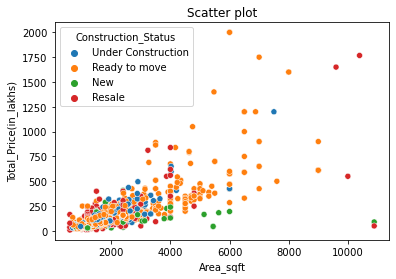

In [37]:
sb.scatterplot('Area_sqft','Total_Price(in_lakhs)',data=bangalore_properties,hue='Construction_Status')
plt.title('Scatter plot')
plt.show()

## Observation: 
   - Ready to move properties are available in wide range of area and price

In [38]:
bangalore_properties.groupby(by=['BHK','Construction_Status'])['Total_Price(in_lakhs)'].min()

BHK  Construction_Status
2    Ready to move          18.00
     Under Construction     27.99
3    New                    17.98
     Ready to move          33.00
     Resale                  9.00
     Under Construction     36.00
4    Ready to move          57.00
     Under Construction     57.60
5    Ready to move          69.00
     Under Construction     65.00
Name: Total_Price(in_lakhs), dtype: float64

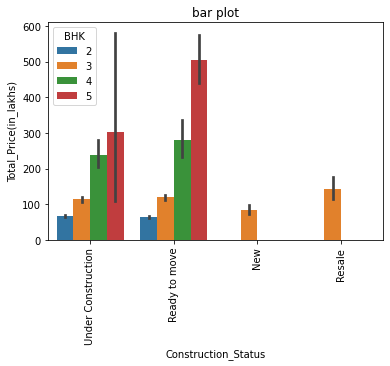

In [39]:
plt.xticks(rotation=90)
sb.barplot(x='Construction_Status',y='Total_Price(in_lakhs)',hue='BHK',data=bangalore_properties)
plt.title('bar plot')
plt.show()

## Obsrevation : 
   - The average total price of new and resale are available  only in 3 BHK 
   - Average total price of 2BHK is minimum
   - Average total price of 5BHK is maximum

## Case 1 :

In [40]:
number_of_bhk=3
area=1800
location='Uttarahalli'
bangalore_flats[(bangalore_flats['BHK']==number_of_bhk) & (bangalore_flats['Area_sqft']>=area) & 
                (bangalore_flats['Location']==location)]

,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price(in_lakhs),Location,Construction_Status
3,Vara Constructions,3,1845,5435,100.00,Uttarahalli,Ready to move
257,S B Urbanscapes,3,1885,7438,140.00,Uttarahalli,Under Construction
260,S B Urbanscapes,3,1890,7438,140.00,Uttarahalli,Under Construction
262,S B Urbanscapes,3,1820,7450,135.00,Uttarahalli,Under Construction
267,S B Urbanscapes,3,1830,7448,136.00,Uttarahalli,Under Construction
270,S B Urbanscapes,3,1815,7451,135.00,Uttarahalli,Under Construction
1446,Lavish Spaces Pvt Ltd,3,1805,5500,99.27,Uttarahalli,Ready to move
1553,Lavish Spaces Pvt Ltd,3,1805,5500,99.27,Uttarahalli,Ready to move
1693,Lavish Spaces Pvt Ltd,3,1800,5950,107.00,Uttarahalli,Ready to move
1694,Lavish Spaces Pvt Ltd,3,1800,5950,107.00,Uttarahalli,Ready to move


## Case 2:

In [41]:
construction_status=(input("Enter the construction status (New , Resale , Ready to move , Under Construction) : "))
minimum_price=float(input("Enter the minimum Total_Price(in lakhs) : "))
miximum_price=float(input("Enter the maximum Total_Price(in lakhs) : "))
bangalore_flats[(bangalore_flats['Construction_Status']==construction_status) &
                (bangalore_flats['Total_Price(in_lakhs)']>=minimum_price) & 
                (bangalore_flats['Total_Price(in_lakhs)']<=miximum_price)].head(10)

Enter the construction status (New , Resale , Ready to move , Under Construction) : Resale
Enter the minimum Total_Price(in lakhs) : 100
Enter the maximum Total_Price(in lakhs) : 200


,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price(in_lakhs),Location,Construction_Status
469,seller,3,1200,10500,126.0,BTM Layout,Resale
471,seller,3,1200,9208,110.0,Jakkur,Resale
476,seller,3,1200,10000,120.0,Hulimavu,Resale
479,seller,3,2400,8250,198.0,Off Bannerghatta Road,Resale
532,seller,3,1440,10069,145.0,Annapurneshwari Nagar,Resale
544,seller,3,2800,6500,182.0,Hulimavu,Resale
545,seller,3,600,27500,165.0,HSR Layout,Resale
566,seller,3,1200,9550,114.0,J. P. Nagar,Resale
571,seller,3,1440,10069,145.0,Harohalli,Resale
618,seller,3,4000,3500,140.0,Kuduregere,Resale


# Conclusion :

- We have 51.39%  of the properties are 2 bhk properties.
- We have 37.35%  of the properties are 3 bhk properties.
- We have 6.72%  of the properties are 4 bhk properties.
- We have 4.74%  of the properties are 5 bhk properties.
- We have maximaum number of flats are ready to move.
- Maximum number of flats in Uttarahalli , Bangalore.
- The Lavish Spaces pvt Ltd is the construction company  who have maximum number of properties
- Maximum number of properties have of area sqft within the range of 900 sqft to 1500 sqft
- Maximum number of properties have of price per sqft within the range of price 4500 per sqft to price 7600 per sqft
- Maximum number of properties have of Total price (in lakhs) within the range of Total price (in lakhs): 30 to Total price (in lakhs): 90
- All the numarical columns have positive correlation
- As the area in sqft increases the total price increases
- As the price per sqft increases the total price increases
- If the area in sqft increase the total price also incerases
- In New  and Resale properties we have only 3 BHK properties avialable
- Most of the properties are in the area range 750 sqft to 1750 sqft have the price range 25 lakhs to 120 lakhs 
- minimum price of 2 BHK is 18 (in lakhs)
- minimum price of 3 BHK is 33 (in lakhs)
- minimum price of 4 BHK is 57 (in lakhs)
- minimum price of 5 BHK is 69 (in lakhs)
